# Etude de marché - La poule qui chante

## Partie 1 - Inspection des données

Je commence par importer les librairies pandas, numpy, seaborn et matplotlib.

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [688]:
population = pd.read_csv("Population_2000_2018.csv", sep=";")
population.head(5)

,Code zone,Zone,Élément,Année,Unité,Valeur
0,2,Afghanistan,Population totale,2000,1000 personnes,20779.953
1,2,Afghanistan,Population totale,2001,1000 personnes,21606.988
2,2,Afghanistan,Population totale,2002,1000 personnes,22600.770
3,2,Afghanistan,Population totale,2003,1000 personnes,23680.871
4,2,Afghanistan,Population totale,2004,1000 personnes,24726.684


In [689]:
population.shape

(4411, 6)

In [690]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  4411 non-null   int64  
 1   Zone       4411 non-null   object 
 2   Élément    4411 non-null   object 
 3   Année      4411 non-null   int64  
 4   Unité      4411 non-null   object 
 5   Valeur     4411 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 206.9+ KB


In [691]:
population = population.rename(columns={"Code zone":"Code pays", "Zone":"Pays", "Valeur":"Population (M)"})
population["Population (M)"] = population["Population (M)"] * 1000
population.head()

,Code pays,Pays,Élément,Année,Unité,Population (M)
0,2,Afghanistan,Population totale,2000,1000 personnes,20779953.0
1,2,Afghanistan,Population totale,2001,1000 personnes,21606988.0
2,2,Afghanistan,Population totale,2002,1000 personnes,22600770.0
3,2,Afghanistan,Population totale,2003,1000 personnes,23680871.0
4,2,Afghanistan,Population totale,2004,1000 personnes,24726684.0


In [692]:
population.drop(['Élément', 'Unité'], axis=1, inplace=True)
population.head()

,Code pays,Pays,Année,Population (M)
0,2,Afghanistan,2000,20779953.0
1,2,Afghanistan,2001,21606988.0
2,2,Afghanistan,2002,22600770.0
3,2,Afghanistan,2003,23680871.0
4,2,Afghanistan,2004,24726684.0


In [693]:
pop_pays = population[['Code pays', 'Pays', 'Population (M)']].groupby('Pays').mean().reset_index().round(0)
pop_pays.head(5)

,Pays,Code pays,Population (M)
0,Afghanistan,2.0,28845767.0
1,Afrique du Sud,202.0,50901472.0
2,Albanie,3.0,2994856.0
3,Algérie,4.0,35858474.0
4,Allemagne,79.0,81527014.0


In [694]:
pop_pays[['Population (M)', 'Code pays']] = pop_pays[['Population (M)', 'Code pays']].astype('int')

In [695]:
pop_pays.head()

,Pays,Code pays,Population (M)
0,Afghanistan,2,28845767
1,Afrique du Sud,202,50901472
2,Albanie,3,2994856
3,Algérie,4,35858474
4,Allemagne,79,81527014


In [696]:
pib = pd.read_csv("PIB par pays.csv", sep=";")
pib.head(5)

,Code zone (M49),Zone,Élément,Produit,Année,Unité,Valeur
0,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1970,millions,1731.435587
1,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1971,millions,1812.837521
2,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1972,millions,1647.900178
3,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1973,millions,1702.716294
4,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1974,millions,2061.729287


In [697]:
pib.shape

(11169, 7)

In [698]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code zone (M49)  11169 non-null  int64  
 1   Zone             11169 non-null  object 
 2   Élément          11169 non-null  object 
 3   Produit          11169 non-null  object 
 4   Année            11169 non-null  int64  
 5   Unité            10275 non-null  object 
 6   Valeur           10275 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 610.9+ KB


In [699]:
pib = pib.rename(columns={"Code zone (M49)":"Code zone", "Zone":"Pays", "Valeur":"PIB (M)"})
pib.head()

,Code zone,Pays,Élément,Produit,Année,Unité,PIB (M)
0,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1970,millions,1731.435587
1,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1971,millions,1812.837521
2,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1972,millions,1647.900178
3,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1973,millions,1702.716294
4,4,Afghanistan,Valeur US $,Produit Intérieur Brut,1974,millions,2061.729287


In [700]:
pib.drop(['Élément', 'Unité', 'Produit'], axis=1, inplace=True)
pib.head()

,Code zone,Pays,Année,PIB (M)
0,4,Afghanistan,1970,1731.435587
1,4,Afghanistan,1971,1812.837521
2,4,Afghanistan,1972,1647.900178
3,4,Afghanistan,1973,1702.716294
4,4,Afghanistan,1974,2061.729287


In [701]:
pib_pays = pib[['Code zone', 'Pays', 'PIB (M)']].groupby('Pays').mean().reset_index().round(2)
pib_pays.head(5)

,Pays,Code zone,PIB (M)
0,Afghanistan,4.0,6933.62
1,Afrique du Sud,710.0,169753.52
2,Albanie,8.0,5752.12
3,Algérie,12.0,81133.00
4,Allemagne,276.0,2052512.60


In [702]:
prix_poulet = pd.read_csv('Prix a la production de poulet.csv', sep=';')
prix_poulet.head()

,Code zone (M49),Zone,Élément,Produit,Année,Unité,Valeur
0,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1991,NaN,NaN
1,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1992,NaN,NaN
2,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1993,NaN,NaN
3,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1994,NaN,NaN
4,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1995,NaN,NaN


In [703]:
prix_poulet.shape

(6169, 7)

In [704]:
prix_poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code zone (M49)  6169 non-null   int64  
 1   Zone             6169 non-null   object 
 2   Élément          6169 non-null   object 
 3   Produit          6169 non-null   object 
 4   Année            6169 non-null   int64  
 5   Unité            1492 non-null   object 
 6   Valeur           1492 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 337.5+ KB


In [705]:
prix_poulet = prix_poulet.rename(columns={"Code zone (M49)":"Code zone", "Zone":"Pays", "Valeur":"Prix Volaille (USD/tonne)"})
prix_poulet.head()

,Code zone,Pays,Élément,Produit,Année,Unité,Prix Volaille (USD/tonne)
0,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1991,NaN,NaN
1,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1992,NaN,NaN
2,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1993,NaN,NaN
3,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1994,NaN,NaN
4,4,Afghanistan,Prix à la Production (USD/tonne),"Viande, poulet, fraîche ou réfrigérée",1995,NaN,NaN


In [706]:
prix_poulet.drop(['Élément', 'Unité', 'Produit'], axis=1, inplace=True)
prix_poulet.head()

,Code zone,Pays,Année,Prix Volaille (USD/tonne)
0,4,Afghanistan,1991,NaN
1,4,Afghanistan,1992,NaN
2,4,Afghanistan,1993,NaN
3,4,Afghanistan,1994,NaN
4,4,Afghanistan,1995,NaN


In [707]:
prix_poulet_pays = prix_poulet[['Code zone', 'Pays', 'Prix Volaille (USD/tonne)']].groupby('Pays').mean().reset_index().round(2)
prix_poulet_pays.head(5)

,Pays,Code zone,Prix Volaille (USD/tonne)
0,Afghanistan,4.0,NaN
1,Afrique du Sud,710.0,1778.70
2,Albanie,8.0,2669.65
3,Algérie,12.0,2515.95
4,Allemagne,276.0,1368.77


In [708]:
distance_france = pd.read_csv('distance france.csv', sep=';')
distance_france.head()

,Pays,Distance (km)
0,Afghanistan,5573
1,Afrique du Sud,8789
2,Albanie,1546
3,Algérie,2024
4,Allemagne,816


In [709]:
insecurite = pd.read_csv('Insecurite alimentaire (3 var).csv', sep=';')
insecurite.head()

,Code zone (M49),Zone,Produit,Année,Unité,Valeur
0,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,1999-2001,NaN,NaN
1,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2000,NaN,NaN
2,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2000-2002,g/personne/jour,13.0
3,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2001,NaN,NaN
4,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2001-2003,g/personne/jour,12.7


In [710]:
insecurite.shape

(36971, 6)

In [711]:
insecurite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36971 entries, 0 to 36970
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code zone (M49)  36971 non-null  int64  
 1   Zone             36971 non-null  object 
 2   Produit          36971 non-null  object 
 3   Année            36971 non-null  object 
 4   Unité            4897 non-null   object 
 5   Valeur           3713 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


In [712]:
insecurite = insecurite.rename(columns={"Code zone (M49)":"Code zone", "Zone":"Pays"})
insecurite.head()

,Code zone,Pays,Produit,Année,Unité,Valeur
0,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,1999-2001,NaN,NaN
1,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2000,NaN,NaN
2,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2000-2002,g/personne/jour,13.0
3,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2001,NaN,NaN
4,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2001-2003,g/personne/jour,12.7


In [713]:
insecurite.drop(['Unité'], axis=1, inplace=True)
insecurite.head()

,Code zone,Pays,Produit,Année,Valeur
0,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,1999-2001,NaN
1,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2000,NaN
2,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2000-2002,13.0
3,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2001,NaN
4,4,Afghanistan,Disponibilités protéines moyennes d’origine an...,2001-2003,12.7


In [714]:
insecurite_pays = insecurite[['Code zone', 'Pays', 'Produit', 'Valeur']].groupby(['Pays', 'Produit']).mean().reset_index().round(0)
insecurite_pays.head(10)

,Pays,Produit,Code zone,Valeur
0,Afghanistan,Disponibilités protéines moyennes d’origine an...,4.0,12.0
1,Afghanistan,Prévalence de l’insécurité alimentaire modérée...,4.0,64.0
2,Afghanistan,Prévalence de l’insécurité alimentaire modérée...,4.0,NaN
3,Afghanistan,Prévalence de l’insécurité alimentaire modérée...,4.0,54.0
4,Afghanistan,Prévalence de l’insécurité alimentaire modérée...,4.0,NaN
5,Afghanistan,Prévalence de l’insécurité alimentaire modérée...,4.0,57.0
6,Afghanistan,Prévalence de l’insécurité alimentaire modérée...,4.0,NaN
7,Afghanistan,Stabilité politique et absence de violence/ter...,4.0,-2.0
8,Afrique du Sud,Disponibilités protéines moyennes d’origine an...,710.0,32.0
9,Afrique du Sud,Prévalence de l’insécurité alimentaire modérée...,710.0,47.0


In [715]:
insecurite_pays_new = insecurite_pays.pivot_table(index=['Pays', 'Code zone'], columns='Produit', values='Valeur').reset_index()
insecurite_pays_new.head()

Produit,Pays,Code zone,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),Prévalence de l’insécurité alimentaire modérée ou grave – femmes adultes (%) (moyenne sur 3 ans),Prévalence de l’insécurité alimentaire modérée ou grave – hommes adultes (%) (moyenne sur 3 ans),Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,4.0,12.0,64.0,54.0,57.0,-2.0
1,Afrique du Sud,710.0,32.0,47.0,39.0,18.0,0.0
2,Albanie,8.0,53.0,38.0,32.0,36.0,0.0
3,Algérie,12.0,23.0,19.0,18.0,20.0,-1.0
4,Allemagne,276.0,61.0,3.0,3.0,4.0,1.0


In [716]:
insecurite_pays_new.drop(
    ['Prévalence de l’insécurité alimentaire modérée ou grave – femmes adultes (%) (moyenne sur 3 ans)', 
     'Prévalence de l’insécurité alimentaire modérée ou grave – hommes adultes (%) (moyenne sur 3 ans)'], 
    axis=1, inplace=True)

In [717]:
insecurite_pays_new = insecurite_pays_new.rename(columns={"Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)":"Disponibilité protéines animales (g/pers/jour)"
                                                          , "Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans)":"Insécurité alimentaire - pop totale (%)"
                                                         , "Stabilité politique et absence de violence/terrorisme (indice)":"Indice stabilité politique"})
insecurite_pays_new.head()

Produit,Pays,Code zone,Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique
0,Afghanistan,4.0,12.0,57.0,-2.0
1,Afrique du Sud,710.0,32.0,18.0,0.0
2,Albanie,8.0,53.0,36.0,0.0
3,Algérie,12.0,23.0,20.0,-1.0
4,Allemagne,276.0,61.0,4.0,1.0


In [755]:
insecurite_pays_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Pays                                            86 non-null     object 
 1   Code zone                                       86 non-null     float64
 2   Disponibilité protéines animales (g/pers/jour)  72 non-null     float64
 3   Insécurité alimentaire - pop totale (%)         59 non-null     float64
 4   Indice stabilité politique                      83 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


In [718]:
disponibilite_alimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
disponibilite_alimentaire.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [719]:
disponibilite_alimentaire.shape

(176600, 14)

In [720]:
disponibilite_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [721]:
disponibilite_alimentaire = disponibilite_alimentaire.rename(columns={"Code zone":"Code pays", "Zone":"Pays"})
disponibilite_alimentaire.head()

,Code Domaine,Domaine,Code pays,Pays,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [722]:
disponibilite_alimentaire.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Code Produit', 'Code année',
                 'Symbole', 'Description du Symbole'], axis=1, inplace=True)
disponibilite_alimentaire.head()

,Code pays,Pays,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0
1,2,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0
2,2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0
3,2,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0
4,2,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0


In [723]:
disponibilite_alimentaire = disponibilite_alimentaire.loc[disponibilite_alimentaire['Produit'] == 'Viande de Volailles']
disponibilite_alimentaire.head()

,Code pays,Pays,Élément,Produit,Année,Unité,Valeur
651,2,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.0
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.0
653,2,Afghanistan,Variation de stock,Viande de Volailles,2017,Milliers de tonnes,0.0
654,2,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.0
655,2,Afghanistan,Pertes,Viande de Volailles,2017,Milliers de tonnes,2.0


In [724]:
disponibilite_alimentaire_new = disponibilite_alimentaire.pivot_table(index=['Pays', 'Code pays'], columns='Élément', values='Valeur').reset_index()
disponibilite_alimentaire_new.head()

Élément,Pays,Code pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,2,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,202,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,3,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,4,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,79,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [725]:
disponibilite_alimentaire_new.drop(
    ['Alimentation pour touristes', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
     'Disponibilité alimentaire en quantité (kg/personne/an)', 
     'Disponibilité de matière grasse en quantité (g/personne/jour)',
     'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure',
     'Nourriture', 'Pertes', 'Résidus', 'Semences', 'Traitement', 'Variation de stock'], 
    axis=1, inplace=True)
disponibilite_alimentaire_new.head()

Élément,Pays,Code pays,Disponibilité alimentaire (Kcal/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,2,5.0,NaN,29.0,28.0
1,Afrique du Sud,202,143.0,63.0,514.0,1667.0
2,Albanie,3,85.0,0.0,38.0,13.0
3,Algérie,4,22.0,0.0,2.0,275.0
4,Allemagne,79,71.0,646.0,842.0,1514.0


In [726]:
disponibilite_alimentaire_new = disponibilite_alimentaire_new.rename(
    columns={"Disponibilité alimentaire (Kcal/personne/jour)":"Disponibilité alimentaire - Volailles (Kcal/personne/jour)",
             "Exportations - Quantité":"Exportations - Volailles (Milliers tonnes)",
             "Importations - Quantité":"Importations - Volailles (Milliers tonnes)",
             "Production":"Production - Volailles (Milliers tonnes)"})
disponibilite_alimentaire_new.head()

Élément,Pays,Code pays,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
0,Afghanistan,2,5.0,NaN,29.0,28.0
1,Afrique du Sud,202,143.0,63.0,514.0,1667.0
2,Albanie,3,85.0,0.0,38.0,13.0
3,Algérie,4,22.0,0.0,2.0,275.0
4,Allemagne,79,71.0,646.0,842.0,1514.0


In [756]:
disponibilite_alimentaire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Pays                                                        172 non-null    object 
 1   Code pays                                                   172 non-null    int64  
 2   Disponibilité alimentaire - Volailles (Kcal/personne/jour)  172 non-null    float64
 3   Exportations - Volailles (Milliers tonnes)                  135 non-null    float64
 4   Importations - Volailles (Milliers tonnes)                  170 non-null    float64
 5   Production - Volailles (Milliers tonnes)                    168 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


## Liaison des différents fichiers

J'ai fait une première liaison entre les fichiers pib_pays et prix_poulet_pays. Je me suis aperçu que le fichier prix_poulet_pays contient une ligne en double Belgique-Luxembourg, je vais donc la supprimer car il y a par ailleurs Belgique et Luxembourg présent. Je me suis également aperçu que Monténégro était écrit Serbie-et-Monténégro, je vais donc remplacer par Monténégro.

In [727]:
prix_poulet_pays[prix_poulet_pays['Pays'] == 'Belgique-Luxembourg']

,Pays,Code zone,Prix Volaille (USD/tonne)
19,Belgique-Luxembourg,58.0,NaN


In [728]:
prix_poulet_pays.drop(prix_poulet_pays.index[19:20], inplace=True)

In [729]:
prix_poulet_pays[prix_poulet_pays['Pays'] == 'Serbie-et-Monténégro']

,Pays,Code zone,Prix Volaille (USD/tonne)
155,Serbie-et-Monténégro,891.0,NaN


In [730]:
prix_poulet_pays.at[155,'Pays'] = 'Monténégro'

In [731]:
prix_poulet_pays.at[155,'Pays']

'Monténégro'

In [732]:
fichier_intermediaire = pd.merge (pib_pays, prix_poulet_pays, how='outer', on=['Pays'], indicator=True)
fichier_intermediaire.head()

,Pays,Code zone_x,PIB (M),Code zone_y,Prix Volaille (USD/tonne),_merge
0,Afghanistan,4.0,6933.62,4.0,NaN,both
1,Afrique du Sud,710.0,169753.52,710.0,1778.70,both
2,Albanie,8.0,5752.12,8.0,2669.65,both
3,Algérie,12.0,81133.00,12.0,2515.95,both
4,Allemagne,276.0,2052512.60,276.0,1368.77,both


In [733]:
fichier_intermediaire.loc[fichier_intermediaire['_merge'] == 'right_only']

,Pays,Code zone_x,PIB (M),Code zone_y,Prix Volaille (USD/tonne),_merge
219,Guadeloupe,NaN,NaN,312.0,NaN,right_only
220,Guyane française,NaN,NaN,254.0,NaN,right_only
221,Martinique,NaN,NaN,474.0,NaN,right_only
222,Réunion,NaN,NaN,638.0,NaN,right_only


In [734]:
fichier_intermediaire.loc[fichier_intermediaire['_merge'] == 'left_only']

,Pays,Code zone_x,PIB (M),Code zone_y,Prix Volaille (USD/tonne),_merge
5,Andorre,20.0,1687.80,NaN,NaN,left_only
7,Anguilla,660.0,139.47,NaN,NaN,left_only
13,Aruba,533.0,1469.63,NaN,NaN,left_only
23,Bermudes,60.0,3313.75,NaN,NaN,left_only
42,Chine - RAS de Macao,446.0,13662.22,NaN,NaN,left_only
51,Curaçao,531.0,2921.39,NaN,NaN,left_only
54,Djibouti,262.0,854.17,NaN,NaN,left_only
68,Groenland,304.0,1353.09,NaN,NaN,left_only
93,Kiribati,296.0,85.50,NaN,NaN,left_only
100,Liechtenstein,438.0,2861.41,NaN,NaN,left_only


Je garde la liaison externe et supprime les colonnes non pertinentes pour lier le prochain fichier.

In [735]:
fichier_intermediaire = fichier_intermediaire.drop(['_merge', 'Code zone_x', 'Code zone_y'], axis=1)
fichier_intermediaire.head()

,Pays,PIB (M),Prix Volaille (USD/tonne)
0,Afghanistan,6933.62,NaN
1,Afrique du Sud,169753.52,1778.70
2,Albanie,5752.12,2669.65
3,Algérie,81133.00,2515.95
4,Allemagne,2052512.60,1368.77


J'ai fait la liaison entre le fichier intermediaire et pop_pays. Je me suis aperçu que le fichier pop_pays contient une ligne en double Serbie-et-Monténégro, je vais donc la supprimer car il y a par ailleurs Serbie et Monténégro présents. Sint Maarten était écrit avec un double espace, j'ai donc supprimer le double espace.       
Je me suis également aperçu que le fichier intermédiaire comprenait des pays qui n'existent plus, je vais donc les enlever : Chine, RFS de Yougoslavie, Tchécoslovaq, URSS, Yemen Dém, Yemen Rep A et Ethiopie RDP.   


In [736]:
pop_pays[pop_pays['Pays'] == 'Serbie-et-Monténégro']

,Pays,Code pays,Population (M)
182,Serbie-et-Monténégro,186,9943209


In [737]:
pop_pays.drop(pop_pays.index[182:183], inplace=True)

In [738]:
pop_pays[pop_pays['Pays'] == 'Sint Maarten  (partie néerlandaise)']

,Pays,Code pays,Population (M)
186,Sint Maarten (partie néerlandaise),280,38990


In [739]:
pop_pays.at[186,'Pays'] = 'Sint Maarten (partie néerlandaise)'

In [740]:
index_suppr = []
for i in range(len(fichier_intermediaire)):
    if fichier_intermediaire.loc[i, 'Pays'] == 'Chine':
        print(f"L'index de la Chine est : {i}")
        index_suppr.append(i)
    elif fichier_intermediaire.loc[i, 'Pays'] == 'URSS':
        print(f"L'index de l'URSS est : {i}")
        index_suppr.append(i)
    elif fichier_intermediaire.loc[i, 'Pays'] == 'Tchécoslovaq':
        print(f"L'index de Tchécoslovaq est : {i}")
        index_suppr.append(i)
    elif fichier_intermediaire.loc[i, 'Pays'] == 'Yemen Dém':
        print(f"L'index de Yemen Dém est : {i}")
        index_suppr.append(i)
    elif fichier_intermediaire.loc[i, 'Pays'] == 'Yémen Rép A':
        print(f"L'index de Yémen Rép A est : {i}")
        index_suppr.append(i)
    elif fichier_intermediaire.loc[i, 'Pays'] == 'Éthiopie RDP':
        print(f"L'index de Éthiopie RDP est : {i}")
        index_suppr.append(i)
    elif fichier_intermediaire.loc[i, 'Pays'] == 'RFS de Yougoslavie':
        print(f"L'index de RFS de Yougoslavie est : {i}")
        index_suppr.append(i)
print(index_suppr)

L'index de la Chine est : 40
L'index de RFS de Yougoslavie est : 147
L'index de Tchécoslovaq est : 184
L'index de l'URSS est : 195
L'index de Yemen Dém est : 201
L'index de Yémen Rép A est : 203
L'index de Éthiopie RDP est : 212
[40, 147, 184, 195, 201, 203, 212]


In [741]:
fichier_intermediaire = fichier_intermediaire.drop(index_suppr)

In [742]:
fichier_intermediaire_2 = pd.merge (fichier_intermediaire, pop_pays, how='outer', on=['Pays'], indicator=True)
fichier_intermediaire_2.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M),_merge
0,Afghanistan,6933.62,NaN,2,28845767,both
1,Afrique du Sud,169753.52,1778.70,202,50901472,both
2,Albanie,5752.12,2669.65,3,2994856,both
3,Algérie,81133.00,2515.95,4,35858474,both
4,Allemagne,2052512.60,1368.77,79,81527014,both


In [743]:
fichier_intermediaire_2.loc[fichier_intermediaire_2['_merge'] == 'right_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M),_merge
216,"Bonaire, Saint-Eustache et Saba",NaN,NaN,278,24139,right_only
217,"Chine, Taiwan Province de",NaN,NaN,214,23010599,right_only
218,Gibraltar,NaN,NaN,82,33196,right_only
219,Guam,NaN,NaN,88,159700,right_only
220,Mayotte,NaN,NaN,270,203270,right_only
221,Nioué,NaN,NaN,160,1673,right_only
222,Sahara occidental,NaN,NaN,205,462381,right_only
223,Saint-Barthélemy,NaN,NaN,282,9623,right_only
224,Saint-Martin (partie française),NaN,NaN,281,36584,right_only
225,Saint-Pierre-et-Miquelon,NaN,NaN,190,6158,right_only


In [744]:
fichier_intermediaire_2.loc[fichier_intermediaire_2['_merge'] == 'left_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M),_merge


In [745]:
fichier_intermediaire_2 = fichier_intermediaire_2.drop(['_merge'], axis=1)
fichier_intermediaire_2.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M)
0,Afghanistan,6933.62,NaN,2,28845767
1,Afrique du Sud,169753.52,1778.70,202,50901472
2,Albanie,5752.12,2669.65,3,2994856
3,Algérie,81133.00,2515.95,4,35858474
4,Allemagne,2052512.60,1368.77,79,81527014


J'ai fait la liaison entre le fichier intermediaire 2 et distance_france.   
Pour les deux fichiers, chaque pays à trouver une correspondance, je n'ai donc rien eu à faire.


In [746]:
fichier_intermediaire_3 = pd.merge (fichier_intermediaire_2, distance_france, how='outer', on=['Pays'], indicator=True)
fichier_intermediaire_3.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M),Distance (km),_merge
0,Afghanistan,6933.62,NaN,2,28845767,5573,both
1,Afrique du Sud,169753.52,1778.70,202,50901472,8789,both
2,Albanie,5752.12,2669.65,3,2994856,1546,both
3,Algérie,81133.00,2515.95,4,35858474,2024,both
4,Allemagne,2052512.60,1368.77,79,81527014,816,both


In [747]:
fichier_intermediaire_3.loc[fichier_intermediaire_3['_merge'] == 'right_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M),Distance (km),_merge


In [748]:
fichier_intermediaire_3.loc[fichier_intermediaire_3['_merge'] == 'left_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Code pays,Population (M),Distance (km),_merge


Le fichier distance pays a trouvé toutes les correspondances avec le fichier intermédiaire. J'enlève la colonne merge et ajoute le prochain fichier.

In [749]:
fichier_intermediaire_3 = fichier_intermediaire_3.drop(['_merge', 'Code pays'], axis=1)
fichier_intermediaire_3.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km)
0,Afghanistan,6933.62,NaN,28845767,5573
1,Afrique du Sud,169753.52,1778.70,50901472,8789
2,Albanie,5752.12,2669.65,2994856,1546
3,Algérie,81133.00,2515.95,35858474,2024
4,Allemagne,2052512.60,1368.77,81527014,816


J'ai fait la liaison entre le fichier intermediaire 3 et insecurite_pays_new. Je me suis aperçu que le fichier insecurite_pays_new contient une seule ligne non correspondante pour Chine. Je l'ai donc renommé Chine, continentale.

In [758]:
insecurite_pays_new[insecurite_pays_new['Pays'] == 'Chine']

Produit,Pays,Code zone,Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique
37,Chine,159.0,35.0,NaN,NaN


In [759]:
insecurite_pays_new.at[37,'Pays'] = 'Chine, continentale'

In [760]:
fichier_intermediaire_4 = pd.merge (fichier_intermediaire_3, insecurite_pays_new, how='outer', on=['Pays'], indicator=True)
fichier_intermediaire_4.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Code zone,Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,_merge
0,Afghanistan,6933.62,NaN,28845767,5573,4.0,12.0,57.0,-2.0,both
1,Afrique du Sud,169753.52,1778.70,50901472,8789,710.0,32.0,18.0,0.0,both
2,Albanie,5752.12,2669.65,2994856,1546,8.0,53.0,36.0,0.0,both
3,Algérie,81133.00,2515.95,35858474,2024,12.0,23.0,20.0,-1.0,both
4,Allemagne,2052512.60,1368.77,81527014,816,276.0,61.0,4.0,1.0,both


In [761]:
fichier_intermediaire_4.loc[fichier_intermediaire_4['_merge'] == 'right_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Code zone,Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,_merge


In [762]:
fichier_intermediaire_4.loc[fichier_intermediaire_4['_merge'] == 'left_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Code zone,Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,_merge
7,Anguilla,139.47,NaN,13158,6668,NaN,NaN,NaN,NaN,left_only
9,Antilles néerlandaises (ex),2007.66,NaN,243870,7574,NaN,NaN,NaN,NaN,left_only
13,Aruba,1469.63,NaN,100686,7639,NaN,NaN,NaN,NaN,left_only
51,Curaçao,2921.39,NaN,158500,7592,NaN,NaN,NaN,NaN,left_only
80,Indonésie,332624.65,2109.38,239134891,11722,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
233,Îles Falkland (Malvinas),NaN,NaN,2925,12387,NaN,NaN,NaN,NaN,left_only
234,Îles Féroé,NaN,NaN,47755,1837,NaN,NaN,NaN,NaN,left_only
235,Îles Mariannes du Nord,NaN,NaN,55981,12276,NaN,NaN,NaN,NaN,left_only
236,Îles Vierges américaines,NaN,NaN,106580,6799,NaN,NaN,NaN,NaN,left_only


Il y a 152 pays du dernier fichier intermediaire qui n'ont pas été associés car le fichier insecurite_pays_new ne contient des données seulement pour environ 80 pays. J'enlève la colonne merge et ajoute le prochain fichier.

In [763]:
fichier_intermediaire_4 = fichier_intermediaire_4.drop(['_merge', 'Code zone'], axis=1)
fichier_intermediaire_4.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique
0,Afghanistan,6933.62,NaN,28845767,5573,12.0,57.0,-2.0
1,Afrique du Sud,169753.52,1778.70,50901472,8789,32.0,18.0,0.0
2,Albanie,5752.12,2669.65,2994856,1546,53.0,36.0,0.0
3,Algérie,81133.00,2515.95,35858474,2024,23.0,20.0,-1.0
4,Allemagne,2052512.60,1368.77,81527014,816,61.0,4.0,1.0


J'ai fait la liaison finale entre le fichier intermediaire 4 et disponibilite_alimentaire_new.      
Je me suis aperçu que le fichier insecurite_pays_new contient une seule ligne non correspondante pour Chine. Je l'ai donc renommé Chine, continentale.

In [853]:
fichier_final = pd.merge (fichier_intermediaire_4, disponibilite_alimentaire_new, how='outer', on=['Pays'], indicator=True)
fichier_final.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,Code pays,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),_merge
0,Afghanistan,6933.62,NaN,28845767,5573,12.0,57.0,-2.0,2.0,5.0,NaN,29.0,28.0,both
1,Afrique du Sud,169753.52,1778.70,50901472,8789,32.0,18.0,0.0,202.0,143.0,63.0,514.0,1667.0,both
2,Albanie,5752.12,2669.65,2994856,1546,53.0,36.0,0.0,3.0,85.0,0.0,38.0,13.0,both
3,Algérie,81133.00,2515.95,35858474,2024,23.0,20.0,-1.0,4.0,22.0,0.0,2.0,275.0,both
4,Allemagne,2052512.60,1368.77,81527014,816,61.0,4.0,1.0,79.0,71.0,646.0,842.0,1514.0,both


In [854]:
fichier_final.loc[fichier_final['_merge'] == 'right_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,Code pays,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),_merge


In [855]:
fichier_final.loc[fichier_final['_merge'] == 'left_only']

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,Code pays,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes),_merge
5,Andorre,1687.80,NaN,78053,417,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,left_only
7,Anguilla,139.47,NaN,13158,6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,Antilles néerlandaises (ex),2007.66,NaN,243870,7574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13,Aruba,1469.63,NaN,100686,7639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
18,Bahreïn,12482.63,NaN,1116858,4791,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Falkland (Malvinas),NaN,NaN,2925,12387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
234,Îles Féroé,NaN,NaN,47755,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
235,Îles Mariannes du Nord,NaN,NaN,55981,12276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
236,Îles Vierges américaines,NaN,NaN,106580,6799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Pour la derniére liaison, on peut voir que le fichier de la disponibilite alimentaire a ete associé pour toutes ces lignes avec l'autre fichier. Il y a seulement 65 pays qui n'étaient pas présents sur ce fichier de la disponibilite.

In [856]:
fichier_final = fichier_final.drop(['_merge', 'Code pays'], axis=1)
fichier_final.head()

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
0,Afghanistan,6933.62,NaN,28845767,5573,12.0,57.0,-2.0,5.0,NaN,29.0,28.0
1,Afrique du Sud,169753.52,1778.70,50901472,8789,32.0,18.0,0.0,143.0,63.0,514.0,1667.0
2,Albanie,5752.12,2669.65,2994856,1546,53.0,36.0,0.0,85.0,0.0,38.0,13.0
3,Algérie,81133.00,2515.95,35858474,2024,23.0,20.0,-1.0,22.0,0.0,2.0,275.0
4,Allemagne,2052512.60,1368.77,81527014,816,61.0,4.0,1.0,71.0,646.0,842.0,1514.0


## Partie 2 - Analyse descriptives des données

In [857]:
fichier_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Pays                                                        238 non-null    object 
 1   PIB (M)                                                     213 non-null    float64
 2   Prix Volaille (USD/tonne)                                   102 non-null    float64
 3   Population (M)                                              238 non-null    int64  
 4   Distance (km)                                               238 non-null    int64  
 5   Disponibilité protéines animales (g/pers/jour)              72 non-null     float64
 6   Insécurité alimentaire - pop totale (%)                     59 non-null     float64
 7   Indice stabilité politique                                  83 non-null     float64
 8   

Je recherche les pays qui ont peu de donnés pour pouvoir les supprimer. J'ai choisi une limite à 50% pour relever les pays dont je vais me séparer.

In [858]:
pays_incomplets = []
for index in range(len(fichier_final.index)):
    print("Pourcentage valeur nulle", index , " : " ,  fichier_final.iloc[index].isna().mean())
    if fichier_final.iloc[index].isna().mean() >= 0.50:
        pays_incomplets.append(index)
print(len(pays_incomplets))
print(pays_incomplets)

Pourcentage valeur nulle 0  :  0.16666666666666666
Pourcentage valeur nulle 1  :  0.0
Pourcentage valeur nulle 2  :  0.0
Pourcentage valeur nulle 3  :  0.0
Pourcentage valeur nulle 4  :  0.0
Pourcentage valeur nulle 5  :  0.5833333333333334
Pourcentage valeur nulle 6  :  0.08333333333333333
Pourcentage valeur nulle 7  :  0.6666666666666666
Pourcentage valeur nulle 8  :  0.08333333333333333
Pourcentage valeur nulle 9  :  0.6666666666666666
Pourcentage valeur nulle 10  :  0.08333333333333333
Pourcentage valeur nulle 11  :  0.0
Pourcentage valeur nulle 12  :  0.0
Pourcentage valeur nulle 13  :  0.6666666666666666
Pourcentage valeur nulle 14  :  0.0
Pourcentage valeur nulle 15  :  0.0
Pourcentage valeur nulle 16  :  0.0
Pourcentage valeur nulle 17  :  0.25
Pourcentage valeur nulle 18  :  0.5833333333333334
Pourcentage valeur nulle 19  :  0.08333333333333333
Pourcentage valeur nulle 20  :  0.08333333333333333
Pourcentage valeur nulle 21  :  0.08333333333333333
Pourcentage valeur nulle 22  :

Pourcentage valeur nulle 185  :  0.4166666666666667
Pourcentage valeur nulle 186  :  0.25
Pourcentage valeur nulle 187  :  0.6666666666666666
Pourcentage valeur nulle 188  :  0.3333333333333333
Pourcentage valeur nulle 189  :  0.25
Pourcentage valeur nulle 190  :  0.3333333333333333
Pourcentage valeur nulle 191  :  0.25
Pourcentage valeur nulle 192  :  0.6666666666666666
Pourcentage valeur nulle 193  :  0.3333333333333333
Pourcentage valeur nulle 194  :  0.25
Pourcentage valeur nulle 195  :  0.4166666666666667
Pourcentage valeur nulle 196  :  0.3333333333333333
Pourcentage valeur nulle 197  :  0.25
Pourcentage valeur nulle 198  :  0.25
Pourcentage valeur nulle 199  :  0.25
Pourcentage valeur nulle 200  :  0.4166666666666667
Pourcentage valeur nulle 201  :  0.0
Pourcentage valeur nulle 202  :  0.08333333333333333
Pourcentage valeur nulle 203  :  0.0
Pourcentage valeur nulle 204  :  0.5
Pourcentage valeur nulle 205  :  0.0
Pourcentage valeur nulle 206  :  0.16666666666666666
Pourcentage 

Il y a un total de 66 pays que je vais retirer car ils ne possèdent pas assez de donées.

In [859]:
fichier_final = fichier_final.drop(pays_incomplets)

In [860]:
#Verifie s'il y a des doublons
duplicate = fichier_final[fichier_final.duplicated()]

duplicate

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
43,"Chine, continentale",3091605.08,1654.34,1360829342,8022,35.0,NaN,NaN,59.0,576.0,452.0,18236.0


La Chine apparait en double je vais donc enlever une ligne. 

In [861]:
fichier_final[fichier_final['Pays'] == 'Chine, continentale']

,Pays,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité protéines animales (g/pers/jour),Insécurité alimentaire - pop totale (%),Indice stabilité politique,Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
42,"Chine, continentale",3091605.08,1654.34,1360829342,8022,35.0,NaN,NaN,59.0,576.0,452.0,18236.0
43,"Chine, continentale",3091605.08,1654.34,1360829342,8022,35.0,NaN,NaN,59.0,576.0,452.0,18236.0


In [862]:
fichier_final = fichier_final.drop(42)

In [863]:
fichier_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 218
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Pays                                                        171 non-null    object 
 1   PIB (M)                                                     170 non-null    float64
 2   Prix Volaille (USD/tonne)                                   92 non-null     float64
 3   Population (M)                                              171 non-null    int64  
 4   Distance (km)                                               171 non-null    int64  
 5   Disponibilité protéines animales (g/pers/jour)              71 non-null     float64
 6   Insécurité alimentaire - pop totale (%)                     59 non-null     float64
 7   Indice stabilité politique                                  73 non-null     float64
 8   

In [864]:
fichier_final.isna().mean()

Pays                                                          0.000000
PIB (M)                                                       0.005848
Prix Volaille (USD/tonne)                                     0.461988
Population (M)                                                0.000000
Distance (km)                                                 0.000000
Disponibilité protéines animales (g/pers/jour)                0.584795
Insécurité alimentaire - pop totale (%)                       0.654971
Indice stabilité politique                                    0.573099
Disponibilité alimentaire - Volailles (Kcal/personne/jour)    0.011696
Exportations - Volailles (Milliers tonnes)                    0.210526
Importations - Volailles (Milliers tonnes)                    0.011696
Production - Volailles (Milliers tonnes)                      0.017544
dtype: float64

Je considère que je n'ai pas assez de données pour les variables Disponibilité protéines animales,
Insécurité alimentaire et Indice stabilité politique.  
Je vais donc les enlever pour mes analyses futures.

In [865]:
fichier_final.drop(['Disponibilité protéines animales (g/pers/jour)', 'Insécurité alimentaire - pop totale (%)',
                 'Indice stabilité politique'], axis=1, inplace=True)
fichier_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 218
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Pays                                                        171 non-null    object 
 1   PIB (M)                                                     170 non-null    float64
 2   Prix Volaille (USD/tonne)                                   92 non-null     float64
 3   Population (M)                                              171 non-null    int64  
 4   Distance (km)                                               171 non-null    int64  
 5   Disponibilité alimentaire - Volailles (Kcal/personne/jour)  169 non-null    float64
 6   Exportations - Volailles (Milliers tonnes)                  135 non-null    float64
 7   Importations - Volailles (Milliers tonnes)                  169 non-null    float64
 8   P

In [866]:
fichier_final.describe()

,PIB (M),Prix Volaille (USD/tonne),Population (M),Distance (km),Disponibilité alimentaire - Volailles (Kcal/personne/jour),Exportations - Volailles (Milliers tonnes),Importations - Volailles (Milliers tonnes),Production - Volailles (Milliers tonnes)
count,1.700000e+02,92.000000,1.710000e+02,171.000000,169.000000,135.000000,169.000000,168.000000
mean,2.103996e+05,2231.646848,3.917966e+07,6034.684211,75.325444,132.185185,89.988166,725.190476
std,8.114108e+05,1042.623759,1.430858e+08,3925.309307,60.783236,513.784440,187.128584,2501.457125
min,8.550000e+01,685.190000,4.849700e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.163792e+03,1528.832500,2.435168e+06,2965.500000,22.000000,0.000000,3.000000,13.750000
50%,1.840928e+04,1961.340000,8.975521e+06,5651.000000,65.000000,3.000000,16.000000,70.000000
75%,1.102665e+05,2712.202500,2.663652e+07,8615.000000,107.000000,32.000000,82.000000,409.750000
max,9.041054e+06,5764.950000,1.360829e+09,19179.000000,243.000000,4223.000000,1069.000000,21914.000000


<AxesSubplot:>

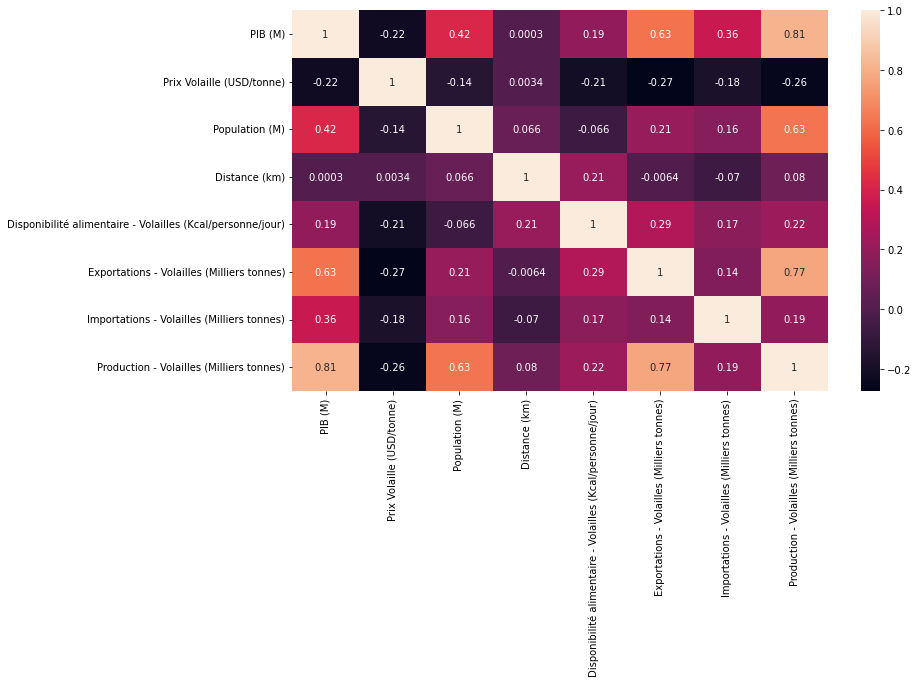

In [867]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(fichier_final.corr(), annot=True)

On retiendra les corrélations le plus intéressantes:

- entre le pib et la production de volailles (0.81)
- entre l'exportation de volailles et la production de volailles (0.77)
- entre le pib et l'exportation de volailles (0.63)
- entre la population et la production de volailles (0.63)

J'exporte le fichier au format csv pour pouvoir retravailler les données. 

In [869]:
fichier_final.to_csv('fichier_final.csv', index=False, encoding='mac_roman', sep=';')